# Block 1 

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

# Block 2 

In [ ]:
# did not use function

def model_func(y,X):
  X = np.array(X)
  y = np.array(y)
  
  Xtrain, Xtest, ytrain, ytest = train_test_split(X.reshape(len(X),1),y,random_state=1)
  #train_test_split(X,y,random_state=1)
  
  
  # train_test_split(X.reshape(len(X),1),y,random_state=1)
 # x_train = np.reshape(x_train.values, (-1, 1))
  
  #train_test_split(X,y,random_state=1) train_test_split(X.array.reshape(1),y,random_state=1)

  tree_model = tree.DecisionTreeClassifier(max_depth=1) 
  tree_model = tree_model.fit(Xtrain, ytrain)

  train_tree = tree_model.score(Xtrain, ytrain)
  test_tree = tree_model.score(Xtest, ytest)

  print(train_tree)
  print(test_tree)

  # Creating ROC curve
  y_predicted = tree_model.predict_proba(Xtest[:,np.newaxis])[:,1]
  fpr,tpr,thresholds = metrics.roc_curve(ytest,y_predicted)

  answer = input("Do you want plots? Y/N?")
  if answer == 'Y': 
# label plots
    fig,axes = plt.subplots(nrows=1,ncols=2) 

    axes[0].plt.plot(fpr,tpr,marker='o',label='ROC curve')
    plt.plot([0,1],[0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')

    sns.boxplot((ytrain,Xtrain),ax=axes[1],color='r',marker='o')
  else:
    return

# Block 3

In [293]:
data = sns.load_dataset('titanic')

# Block 4

In [294]:
X = data[['fare']]
y = data[['survived']]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=1)

# Make decision tree binary classification
tree_model = tree.DecisionTreeClassifier(max_depth=5) 
tree_model = tree_model.fit(Xtrain, ytrain)

# Ensure no overfitting
train_tree = tree_model.score(Xtrain, ytrain)
test_tree = tree_model.score(Xtest, ytest)

# Comparing training and testing data
print("Training:", train_tree)
print("Testing:", test_tree)

# Create ROC Curve
y_predicted = tree_model.predict_proba(Xtest)[:,1]
fpr,tpr,thresholds = metrics.roc_curve(ytest,y_predicted)

Training: 0.7140718562874252
Testing: 0.6143497757847534


Do you want plots? Y/N?Y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


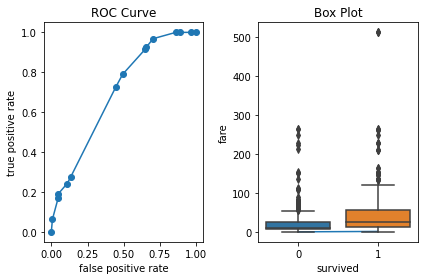

In [295]:
# Create input argument
answer = input("Do you want plots? Y/N?")
if answer == 'Y': 
# label plots
  fig,axes = plt.subplots(1,2) 

  # Creating plot with ROC Curve
  axes[0].plot(fpr,tpr,marker='o',label='ROC curve')
  plt.plot([0,1],[0,1])
  axes[0].set_title('ROC Curve')
  axes[0].set_xlabel('false positive rate')
  axes[0].set_ylabel('true positive rate')

  # Creating boxplot
  axes[1].set_title('Box Plot')
  sns.boxplot(data['survived'],data['fare'])
  plt.tight_layout()

# Block 5

In [298]:
X1 = data[['pclass']]
y1 = data[['survived']]
Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(X1,y1,random_state=1)

# Make decision tree binary classification
tree_model1 = tree.DecisionTreeClassifier(max_depth=5) 
tree_model1 = tree_model.fit(Xtrain1, ytrain1)

# Ensure no overfitting
train_tree1 = tree_model.score(Xtrain1, ytrain1)
test_tree1 = tree_model.score(Xtest1, ytest1)

# comparing training and testing data
print("Training:", train_tree1)
print("Testing:", test_tree1)

# Create ROC Curve
y_predicted1 = tree_model.predict_proba(Xtest1)[:,1]
fpr1,tpr1,thresholds = metrics.roc_curve(ytest1,y_predicted1)

Training: 0.6826347305389222
Testing: 0.6681614349775785


Do you want plots? Y/N?Y


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


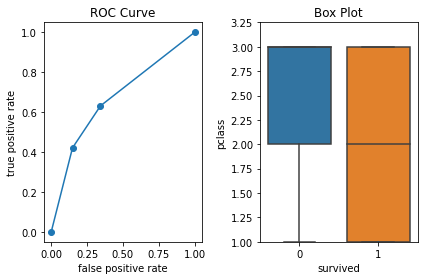

In [299]:
# Create input argument
answer = input("Do you want plots? Y/N?")
if answer == 'Y': 
  fig,axes = plt.subplots(1,2) 

  # Creating plot with ROC Curve
  axes[0].plot(fpr1,tpr1,marker='o',label='ROC curve')
  plt.plot([0,1],[0,1])
  axes[0].set_title('ROC Curve')
  axes[0].set_xlabel('false positive rate')
  axes[0].set_ylabel('true positive rate')

  # Creating boxplot 
  axes[1].set_title('Box Plot')
  sns.boxplot(data['survived'],data['pclass'])
  axes[1].set_ylim([1,3.25])
  plt.tight_layout()

I found that a better class (Pclass) is a better predictor of survival because the ROC Curve plot seems to show a better rate between true positive and false positive rate than the plot with ticket fare. It shows a better chance of having a true positive rate with a lower false positive rate. In addition, in terms of the box plot, there are not any outliers like the one with ticket fare where the outliers make it more tough to see and unpredictability. It boxplot with pclass shows that those who are in a better class are more likely to survive. 